# Linear Classification Algorithms
This notebook contains implementations and comparisons of linear classification algorithms, including the Perceptron, Logistic Regression, and Support Vector Machines.

## Contents
- Introduction
- Dataset Preparation
- Perceptron Algorithm Implementation
- Visualization of Decision Boundaries
- Extensions to Other Algorithms
- Conclusion

## Introduction
In this project, we explore fundamental machine learning algorithms with a focus on linear classification tasks in two dimensions. We begin with the **Perceptron algorithm**, analyzing its updates and decision boundaries. Then, we generalize to other linear classifiers for comparison.

The objective is to understand how linear classifiers learn decision boundaries and how their performance differs.

## Dataset Preparation
We generate a synthetic dataset for binary classification in 2D space. This allows us to visualize the learning process of the algorithms.

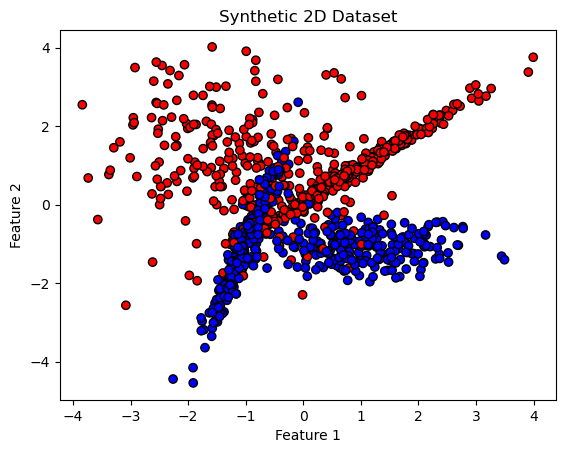

In [29]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore")

# Generate synthetic 2D dataset
X, y = make_classification(n_samples=1000, n_features=2, 
                           n_informative=2, n_redundant=0,
                           n_classes=2, random_state=42)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Synthetic 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Perceptron Algorithm Implementation
We implement the Perceptron algorithm step by step and visualize how the decision boundary evolves.

In [30]:

class Perceptron:
    def __init__(self, learning_rate=0.1, n_iters=10):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y == 0, -1, 1)
        
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                update = self.lr * y_[idx]
                if y_[idx] * (np.dot(x_i, self.weights) + self.bias) <= 0:
                    self.weights += update * x_i
                    self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Train perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=10)
perceptron.fit(X, y)
y_pred = perceptron.predict(X)

# Accuracy
accuracy = np.mean(y_pred == y)
print("Perceptron Accuracy:", accuracy)


Perceptron Accuracy: 0.809


## Visualization of Decision Boundary
We can now visualize the decision boundary learned by the perceptron.

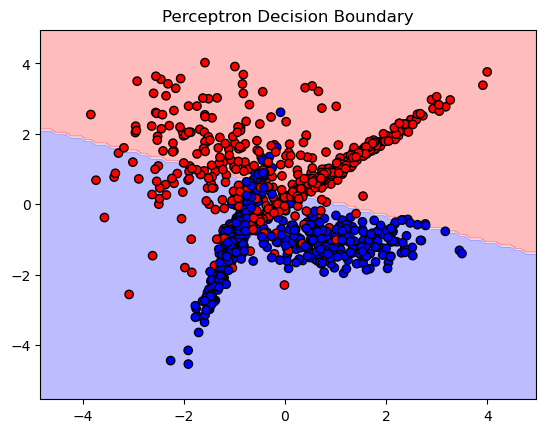

In [31]:

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title("Perceptron Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, perceptron)


## Extensions to Other Algorithms
We can also train other classifiers, such as Logistic Regression and SVM, for comparison.

In [32]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)
print("Logistic Regression Accuracy:", log_reg.score(X, y))

# SVM
svm = SVC(kernel='linear')
svm.fit(X, y)
print("SVM Accuracy:", svm.score(X, y))


Logistic Regression Accuracy: 0.866
SVM Accuracy: 0.868


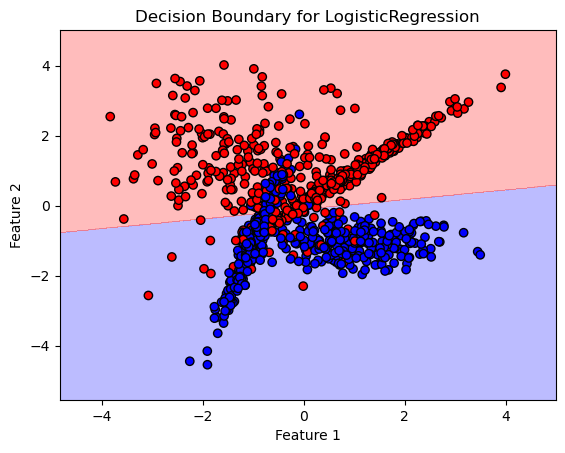

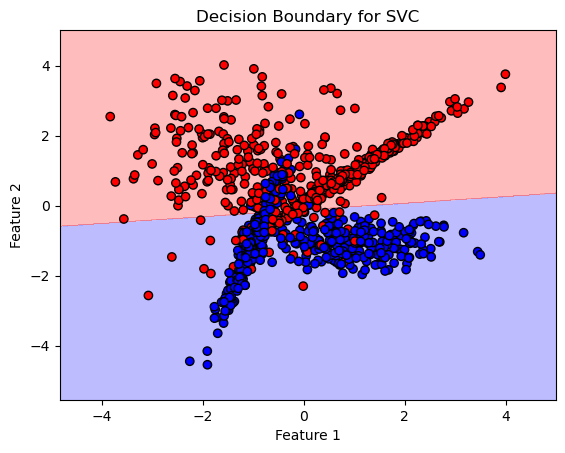

In [33]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='bwr')
    plt.title(f"Decision Boundary for {model.__class__.__name__}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, log_reg)
plot_decision_boundary(X, y, svm)

## Conclusion
This notebook demonstrated the implementation of the Perceptron algorithm, visualization of its decision boundary, and comparison with other linear classifiers. This project highlights how simple algorithms can be extended and compared to more advanced models.